### <font color = green> Problem Statement:

**<font color = purple>This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.** 

 -  **<font color = purple>Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors**

- **<font color = purple>Output: Number of predicted wins (W)**

### <font color = green>Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle
from scipy.stats import zscore
import scikitplot as skplt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score,roc_curve,plot_roc_curve
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

### <font color = green>Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\csv file\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


### <font color = green>Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (30, 17)


### <font color = green>Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

----------------------


#### <font color = purple>There is no null value

### <font color = green>Information about dataset

In [5]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None

----------------------------------------------------


#### <font color = purple>All are int and float value

### <font color = green>Statistical Analysis of Dataset

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


#### <font color = purple>All data is normal dustributed 

### <font color = green>Checking Outliers

---------------------
Distribution Plot :- 
---------------------


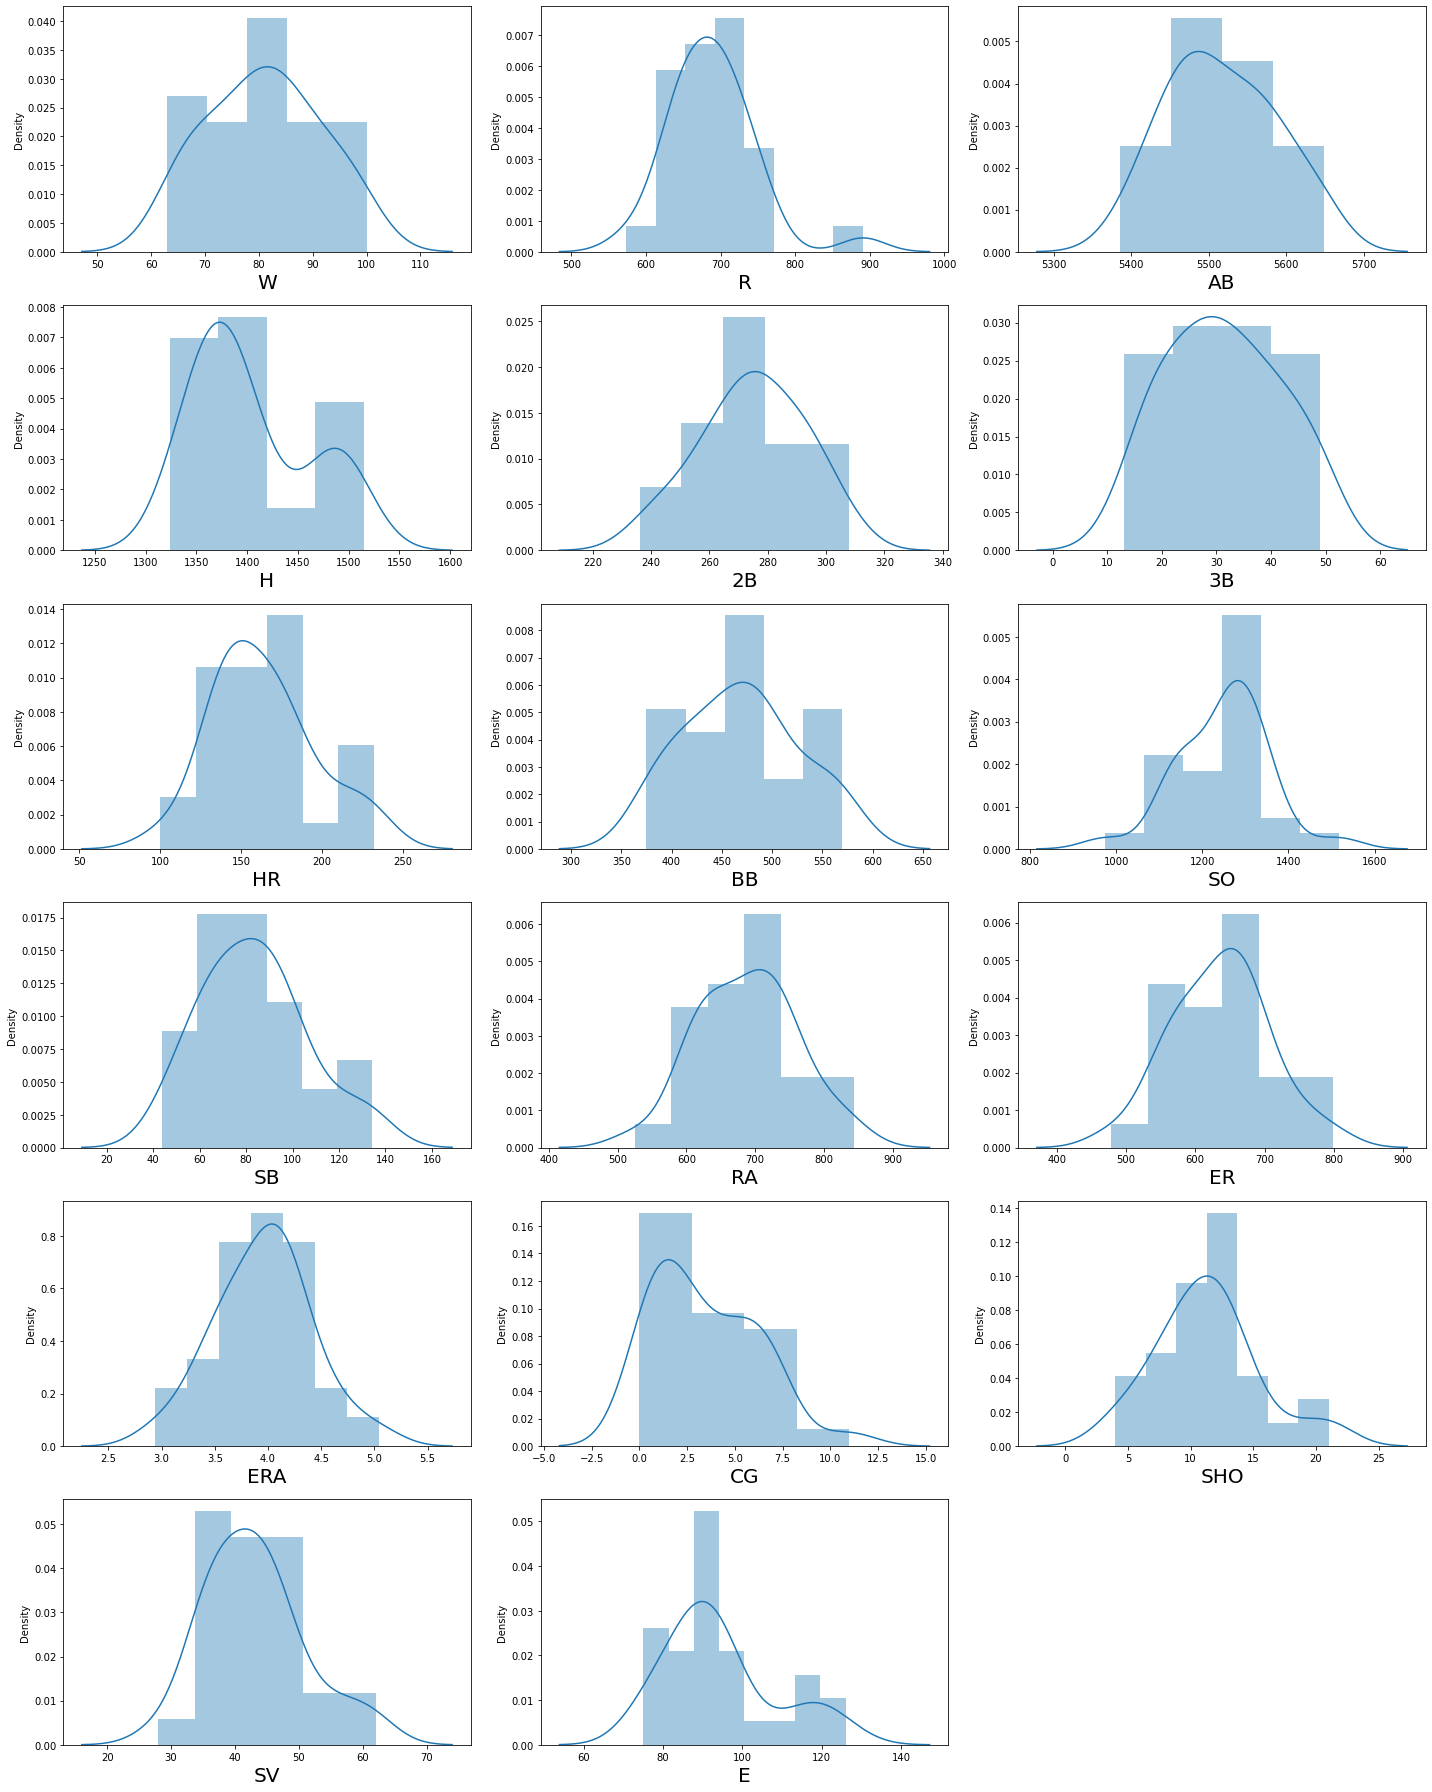

In [7]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in df:
    if plotnumber <=18:
        ax = plt.subplot(6,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### <font color = purple> Features are little skewed

------------------
Box Plot :-
------------------


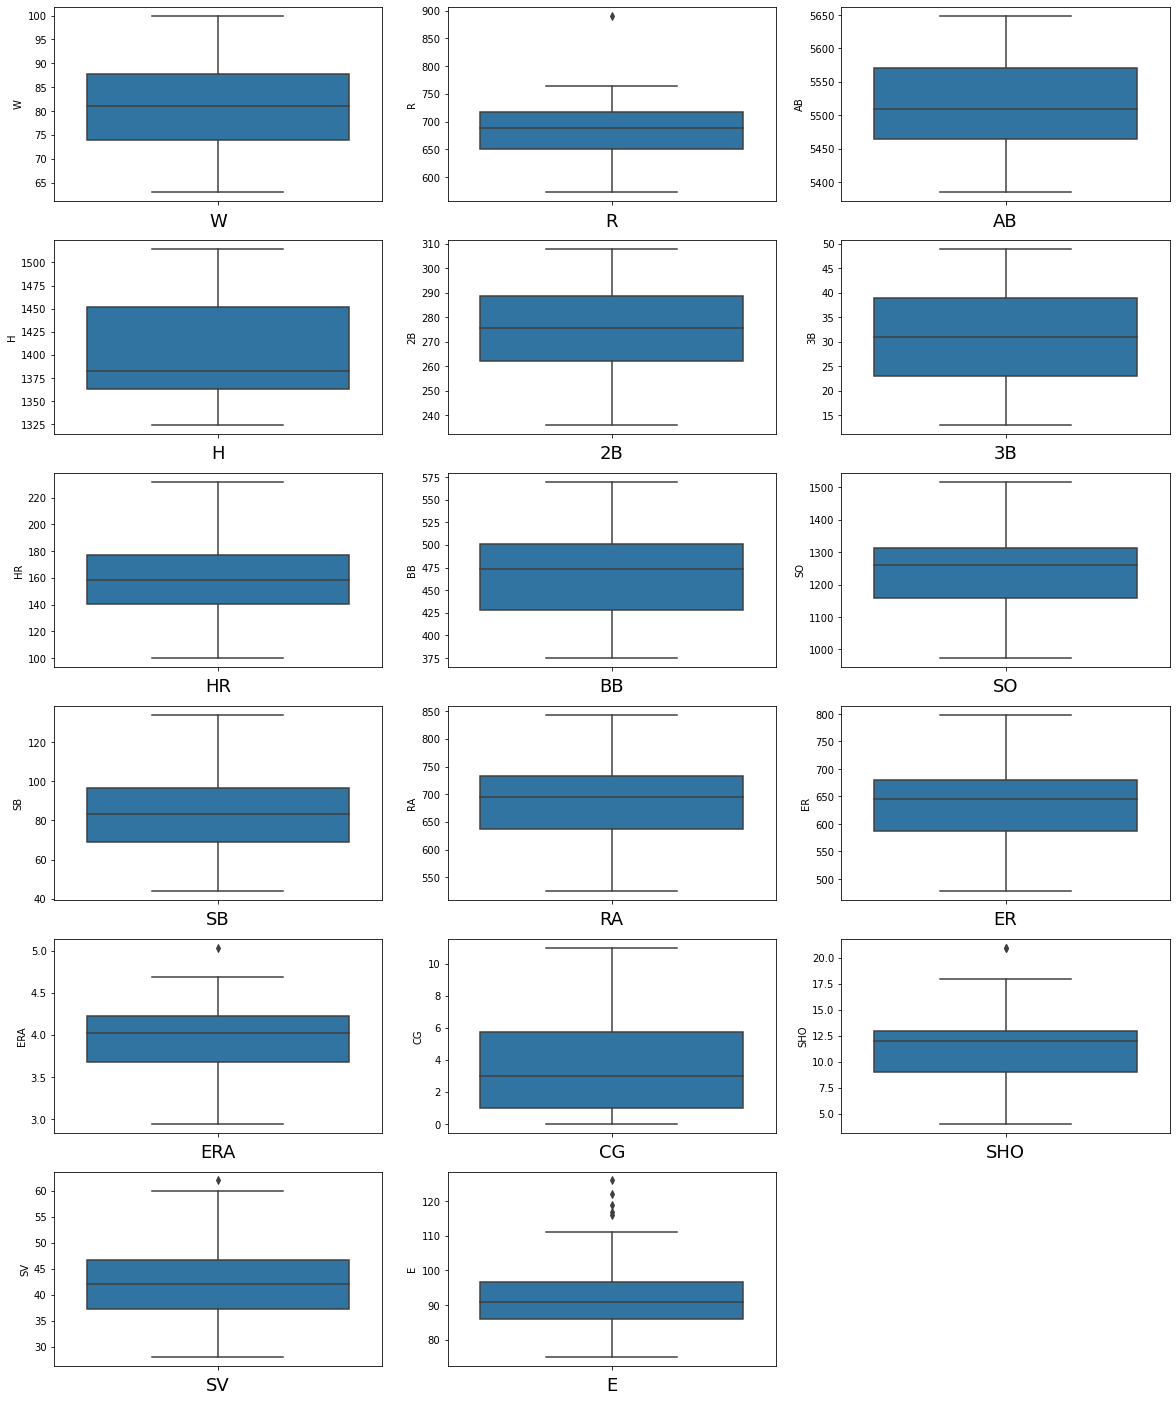

In [8]:
# Visualize the outliers using boxplot
print('------------------')
print('Box Plot :-')
print('------------------')

plt.figure(figsize = (20,25))
graph = 1

for column in df:
    if graph <=18:
        ax = plt.subplot(6,3, graph)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    graph +=1
plt.show()

#### <font color = purple>There are some outlier present in our dataset

### <font color = green>Removing Outliers using Zscore

In [10]:
# with std 3 Lets see the stats

z_score = zscore(df[['SV', 'ERA', 'SHO', 'R', 'E']]) # use only continous data
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]

### <font color = green> Checking Outlier Remove or Not

------------------
Box Plot :-
------------------


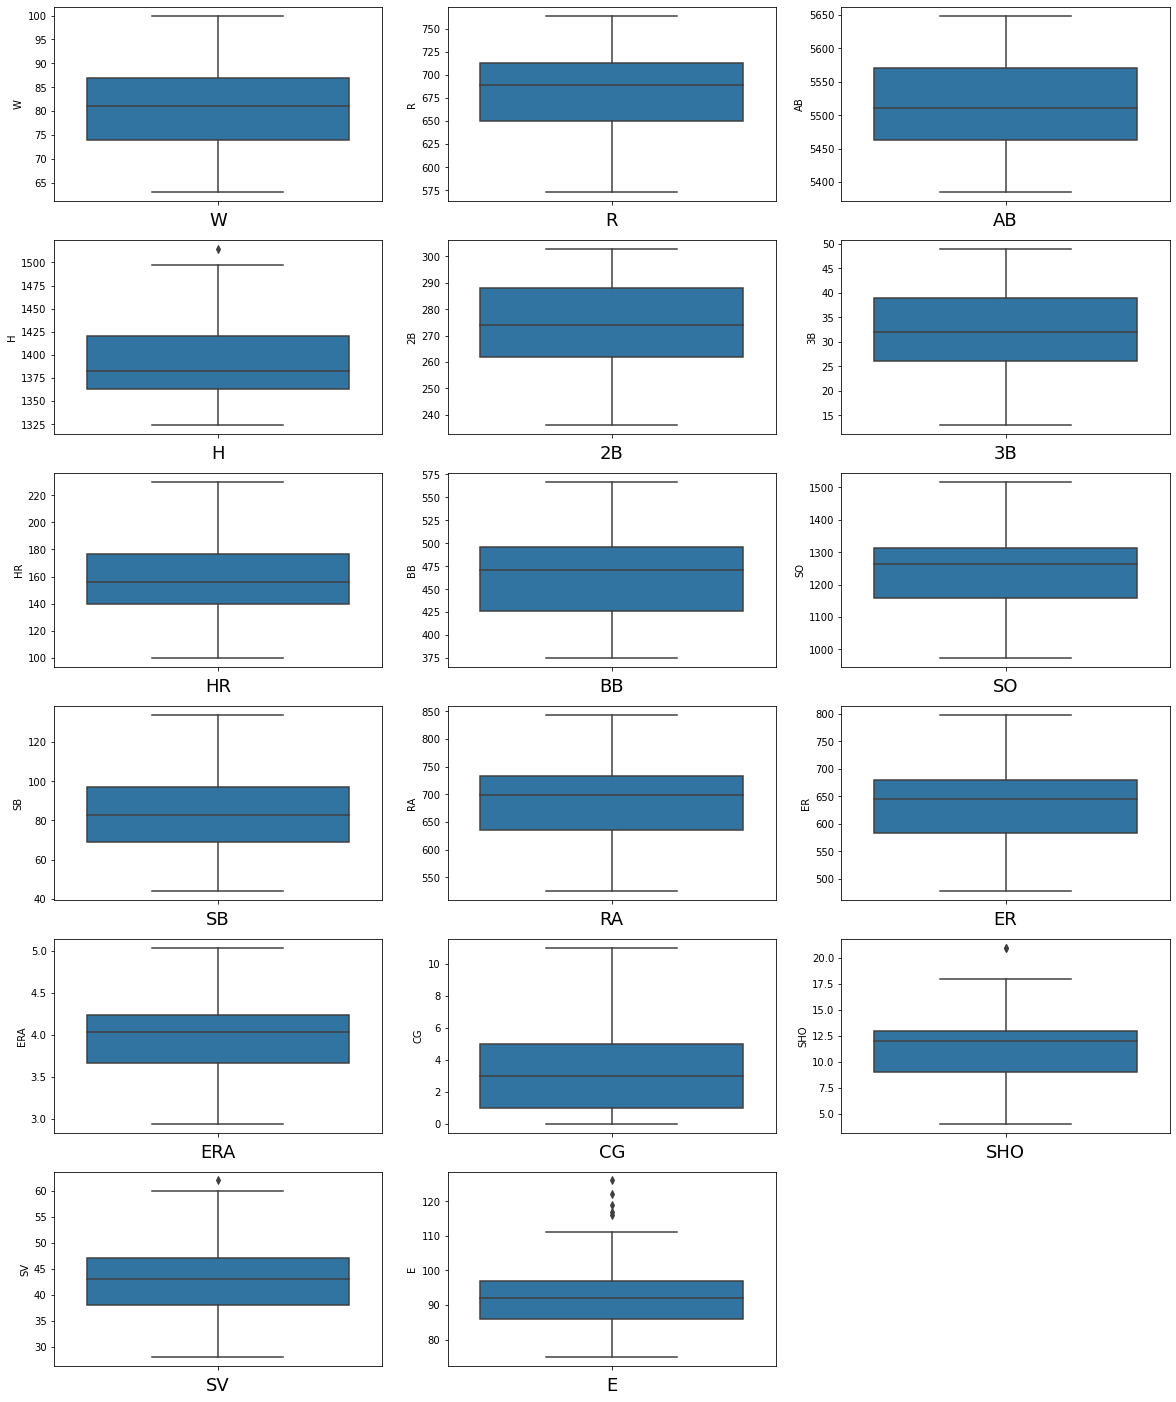

In [11]:
# Visualize the outliers using boxplot
print('------------------')
print('Box Plot :-')
print('------------------')

plt.figure(figsize = (20,25))
graph = 1

for column in df:
    if graph <=18:
        ax = plt.subplot(6,3, graph)
        sns.boxplot(y=df[column]) # It is the axis for vertical set as y
        plt.xlabel(column, fontsize = 18)
    graph +=1
plt.show()

#### <font color = purple>Outliers are Removed

### <font color = green> Checking for Imbalance Label

In [12]:
print('-----------------------------------')
print('No of wins matches :')
print('-----------------------------------')
print(df['W'].value_counts())
print('-----------------------------------')

-----------------------------------
No of wins matches :
-----------------------------------
68     3
74     2
76     2
81     2
83     2
64     1
84     1
100    1
92     1
90     1
88     1
87     1
86     1
85     1
80     1
97     1
79     1
78     1
63     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64
-----------------------------------


#### <font color = purple>Label are balanced 

### <font color = green>Checking Skewness in Dataset

In [13]:
print('==================')
print('Skewness in data :')
print('==================')
print(df.skew())
print('==================')

Skewness in data :
W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64


#### <font color = purple>Some features are little skewed

### <font color = green>Corelation of Feature vs Label using Heat map

Heat Map :


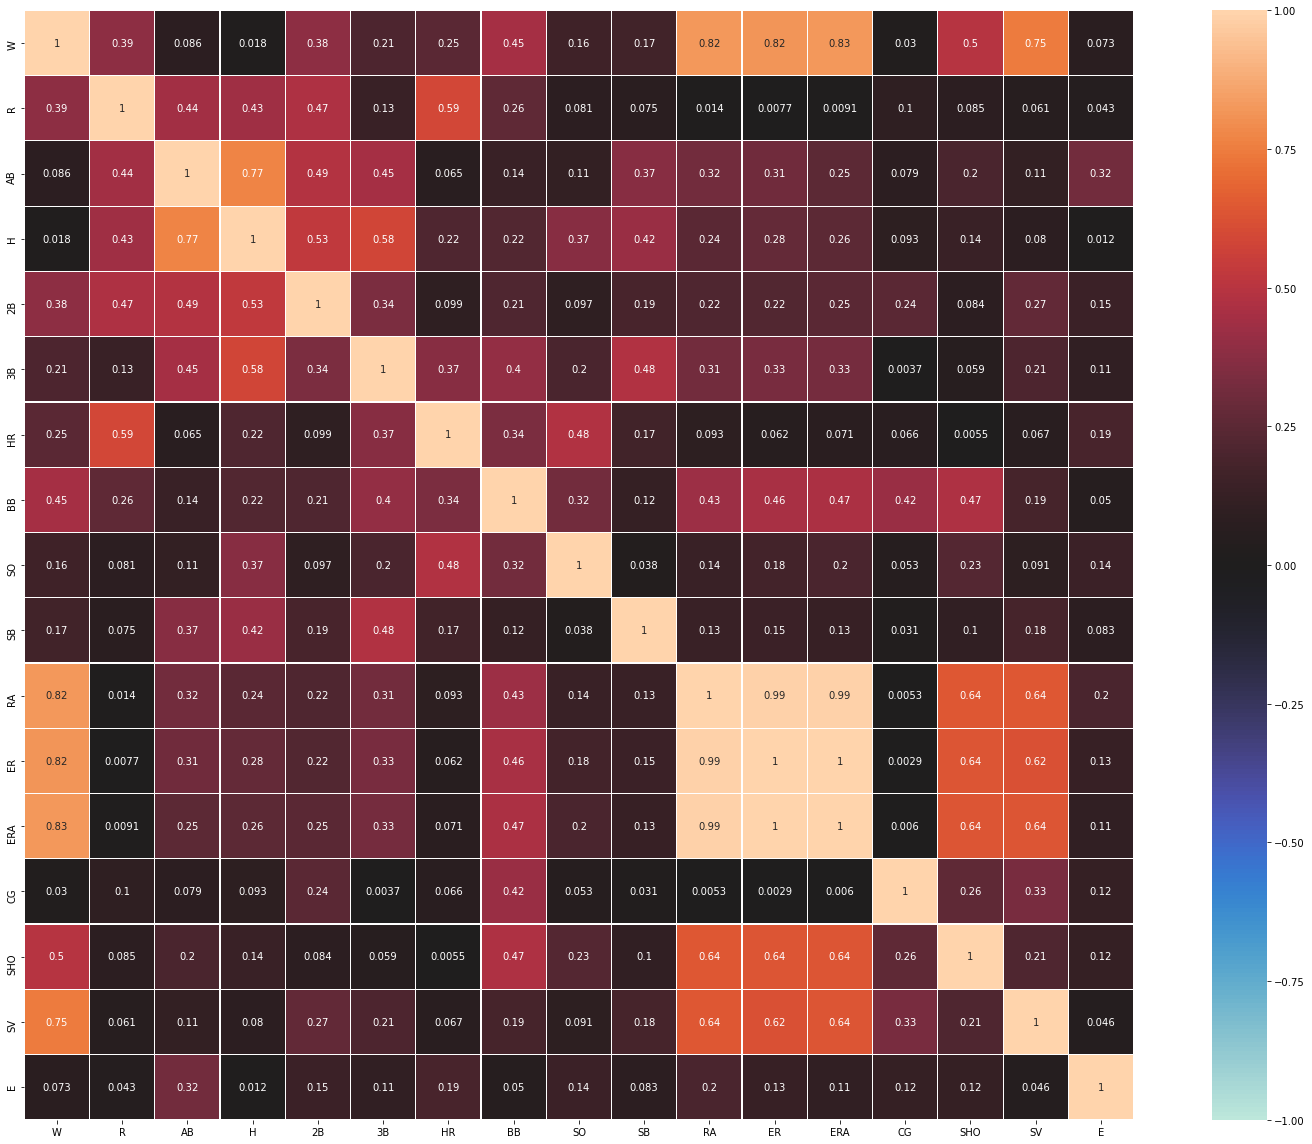

In [14]:
print('===========')
print('Heat Map :')
print('===========')
df_corr = df.corr().abs()

plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, annot = True, square = True, center = 0, fmt = '.2g', linewidths = .1)
plt.tight_layout()

#### <font color = purple>ERA and ER are show higest corelation and RA show least corelation with label

### <font color = green> Spliting Dataset into features and labels

In [15]:
x = df.drop('W', axis = 1)
y = df.W
print('Data has been splited')

Data has been splited


------------------------
Distribution Plot :-
------------------------


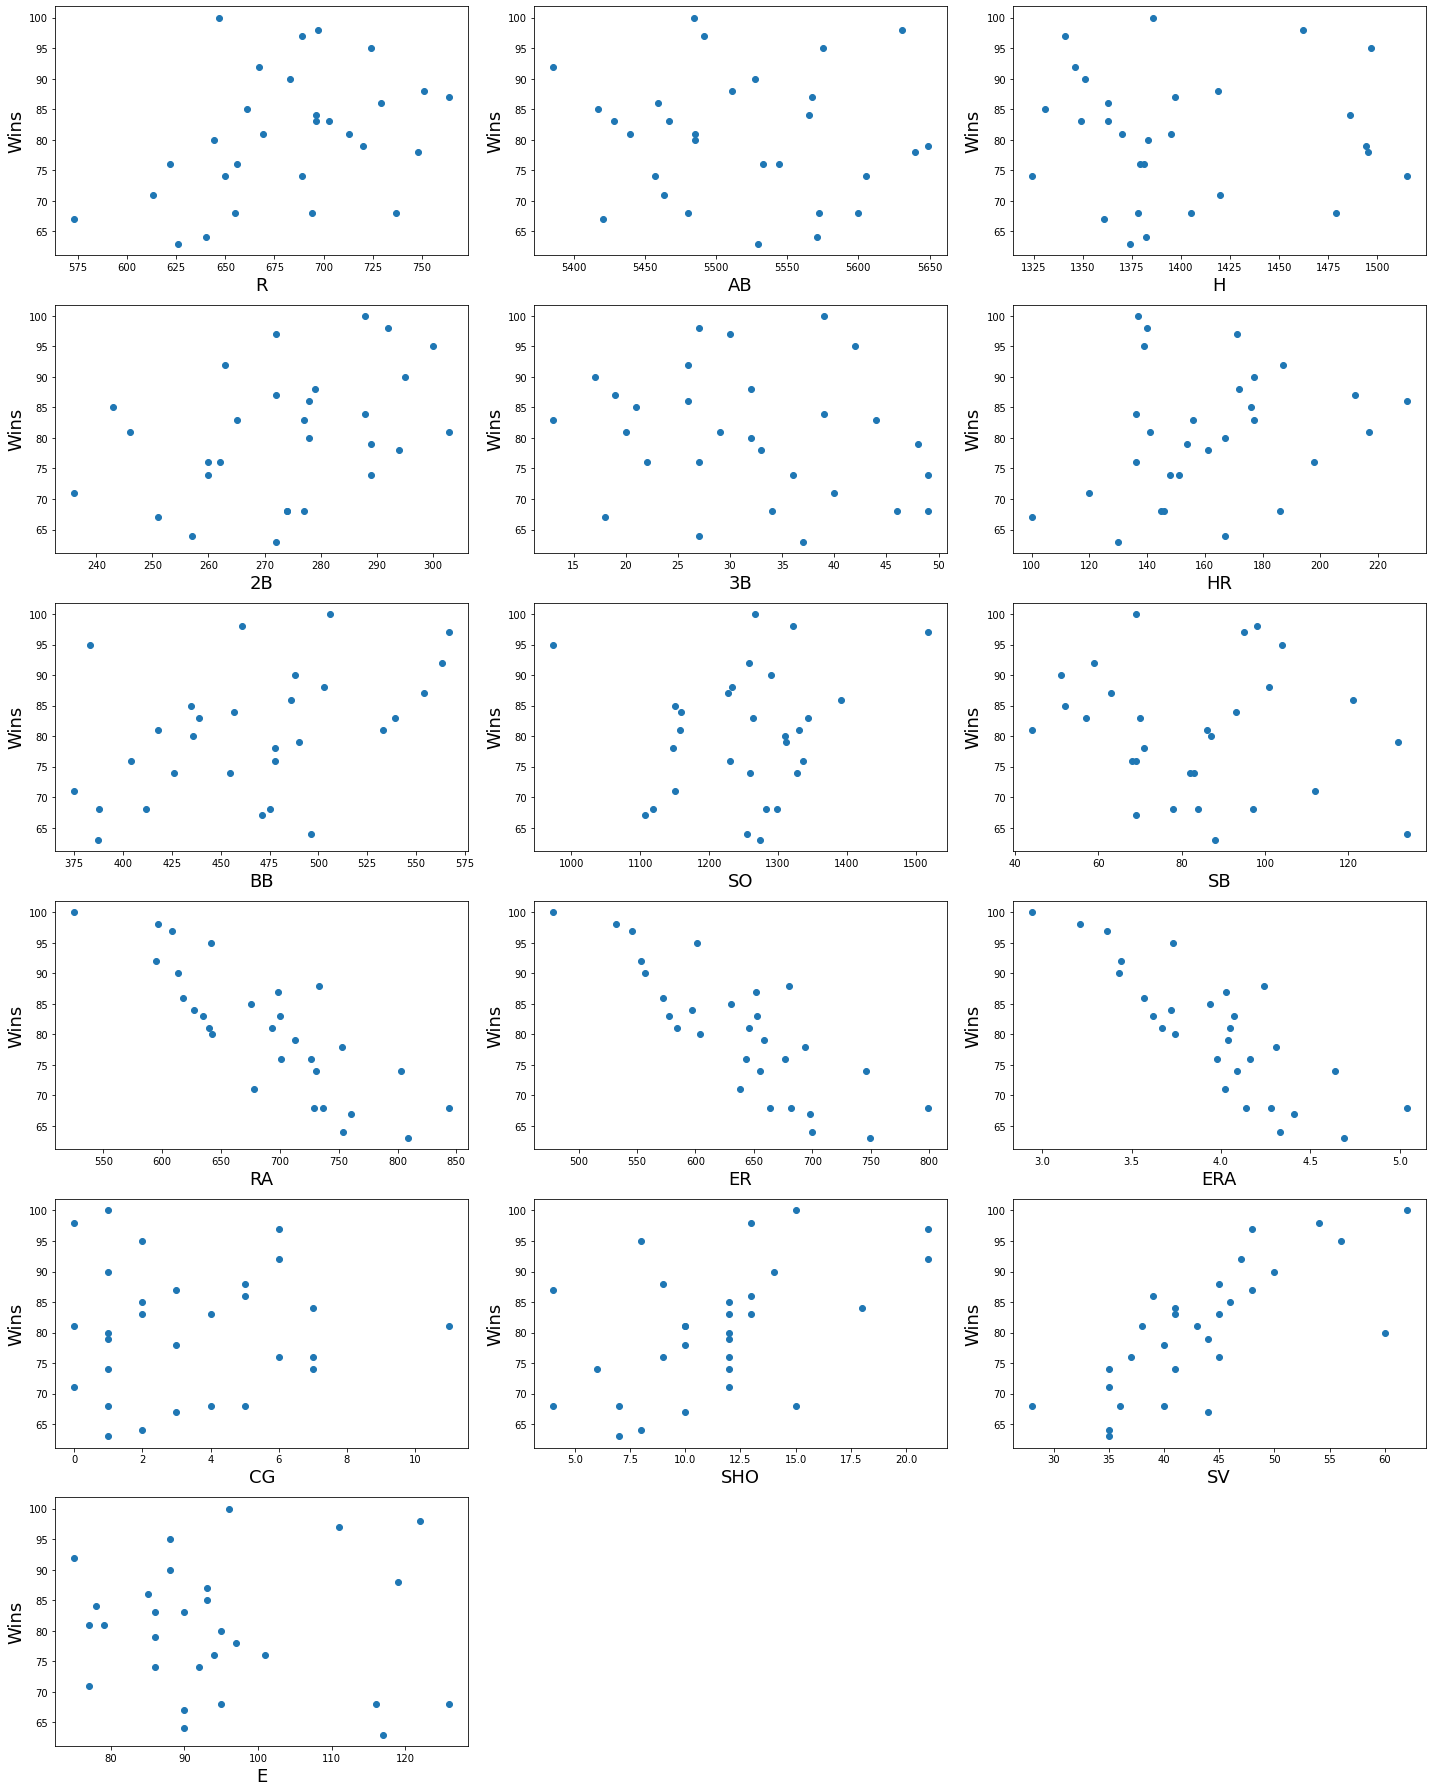

In [16]:
# Let' see relation between features and labels.
print('------------------------')
print('Distribution Plot :-')
print('------------------------')

plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1
for column in x:
    if plotnumber <=18:
        ax = plt.subplot(6,3, plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 18)
        plt.ylabel('Wins', fontsize = 18)
    plotnumber += 1
plt.tight_layout()

#### <font color = purple>Above scatter shows positive relation between featues and target

### <font color = green>Analysis of Data

In [17]:
run = df.groupby('W')['R','H'].sum()
run

,R,H
W,,
63,626,1374
64,640,1382
67,573,1361
68,2086,4262
71,613,1420
74,1339,2839
76,1278,2760
78,748,1495
79,720,1494


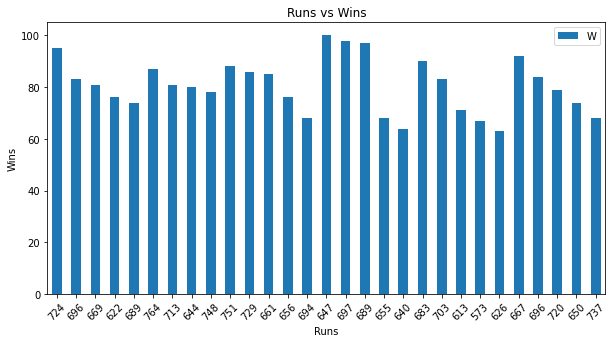

In [18]:
df.plot.bar( x = 'R', y = 'W', figsize = (10,5), rot = 45)
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.title('Runs vs Wins')
plt.show()

#### <font color = purple>Maximum matches win when team score between 640 to 730 . A maximum Hits run when team score 2000+ run.

In [19]:
hr = df.groupby('W')['E'].sum()
hr

W
63     117
64      90
67      90
68     337
71      77
74     178
76     195
78      97
79      86
80      95
81     156
83     176
84      78
85      93
86      85
87      93
88     119
90      88
92      75
95      88
97     111
98     122
100     96
Name: E, dtype: int64

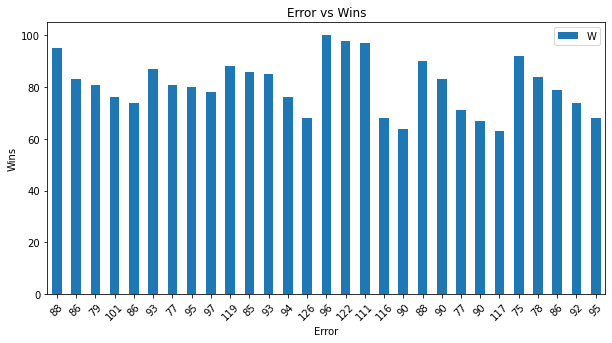

In [20]:
df.plot.bar( x = 'E', y = 'W', figsize = (10,5), rot = 45)
plt.xlabel('Error')
plt.ylabel('Wins')
plt.title('Error vs Wins')
plt.show()

#### <font color = purple>Highest Error in range of 90 to 113.

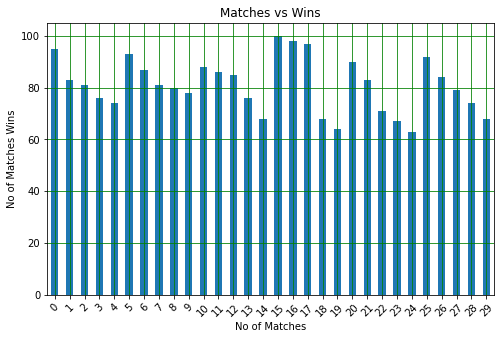

In [26]:
df['W'].plot.bar(figsize = (8, 5), rot = 45)
plt.grid(which = 'major', c = 'g')
plt.xlabel('No of Matches')
plt.ylabel('No of Matches Wins')
plt.title('Matches vs Wins')
plt.show()

#### <font color = purple> Range 15 to 17 higest matches wins

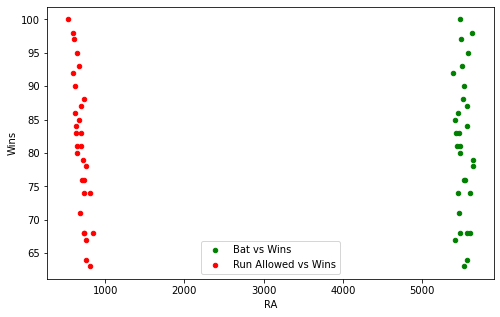

In [33]:
ax = df.plot.scatter(x = 'AB', y = 'W' , label = 'Bat vs Wins', color = 'g')
df.plot.scatter(x = 'RA', y = 'W' , label = 'Run Allowed vs Wins', ax = ax, color = 'r', figsize = (8,5))
plt.ylabel('Wins')
plt.show()

#### <font color = purple> It shows positive relation

### <font color = green>Power Transform

In [21]:
x = power_transform(x)

In [22]:
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052227e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800484e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213883e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

### <font color = green> Handling Class Imbalance

In [23]:
from imblearn.over_sampling import RandomOverSampler
ros  = RandomOverSampler()
x_over, y_over = ros.fit_resample(x, y)

In [24]:
print('---------------------')
print('Class are balanced :-')
print('---------------------')
print(y_over.value_counts())
print('---------------------')

---------------------
Class are balanced :-
---------------------
63     3
84     3
98     3
97     3
95     3
92     3
90     3
88     3
87     3
86     3
85     3
83     3
64     3
81     3
80     3
79     3
78     3
76     3
74     3
71     3
68     3
67     3
100    3
Name: W, dtype: int64
---------------------


#### <font color = purple>Class are balanced

### <font color = green> Data Scaling

In [25]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052227e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800484e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213883e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

#### <font color = purple> Data has been scaled

### <font color = green>Split data into train and test. Model will be bulit on training data and tested on test data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## <font color = green>Model Building

### <font color = green> Decision Tree model instantiaing, training and evaluating

In [27]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [28]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       1.00      1.00      1.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       1.00      1.00      1.00         1
          83       1.00      1.00      1.00         1
          84       1.00      1.00      1.00         2
          85       1.00      1.00      1.00         1
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00       

#### <font color = purple>Conclusion : Decision Tree model has 83% score

### <font color = green>Cross Validation score to check if the model is overfitting

In [54]:
cv = cross_val_score(DT, x, y, cv = 3)
print('Cross Validation score of Decision Tree model --->', cv.mean())

Cross Validation score of Decision Tree model ---> 0.037037037037037035


####  <font color = purple>Conclusion : Decision Tree model has 3% Cross Validation score

### <font color = green> ROC, AUC Curve

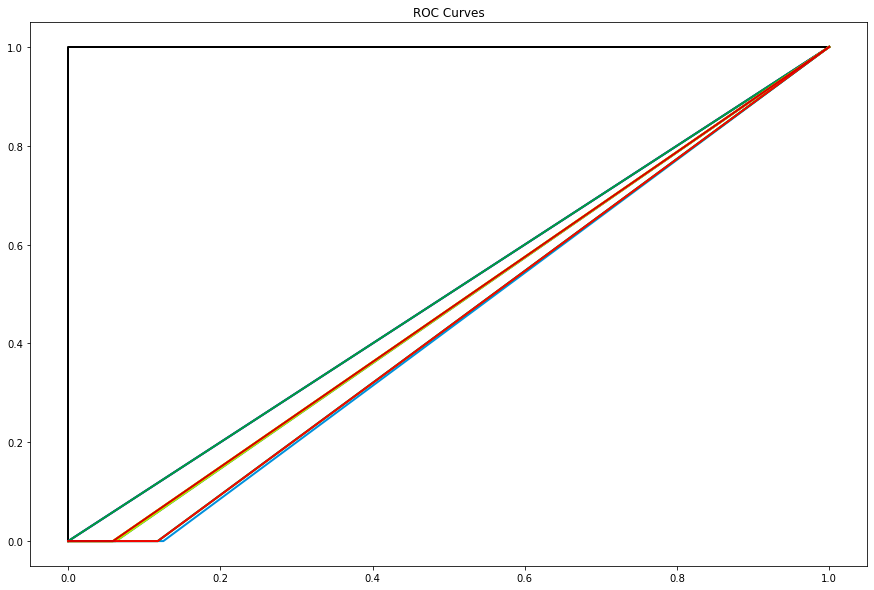

In [30]:
try:
    prob = DT.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green>Knn model instantiaing, training and evaluating

In [31]:
Knn = KNeighborsClassifier()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [32]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          64       0.00      0.00      0.00         0
          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         2
          79       0.33      1.00      0.50         1
          80       1.00      1.00      1.00         1
          81       0.00      0.00      0.00         1
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         2
          85       1.00      1.00      1.00         1
          88       0.00      0.00      0.00         0
          90       0.00      0.00      0.00       

#### <font color = purple>Conclusion : Knn model has 28% score

### <font color = green> Cross Validation score to check if the model is overfitting

In [58]:
cv = cross_val_score(Knn, x, y, cv = 3)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.0


#### <font color = purple>Conclusion : Knn model has 0% Cross Validation score

### <font color = green>ROC, AUC Curve

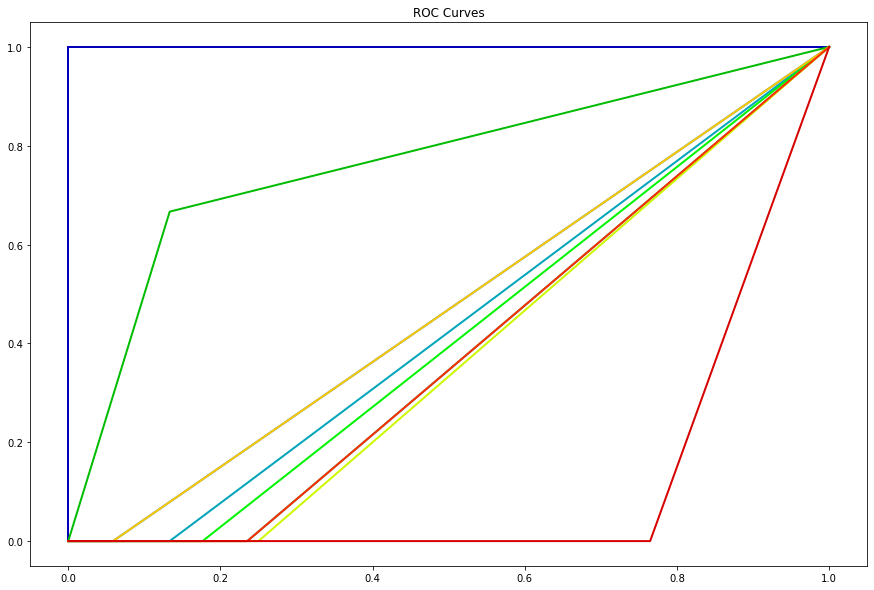

In [34]:
try:
    prob = Knn.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green>Random Forest model instantiaing, training and evaluating

In [35]:
Rn = RandomForestClassifier()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [36]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       1.00      1.00      1.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       1.00      1.00      1.00         1
          83       1.00      1.00      1.00         1
          84       1.00      1.00      1.00         2
          85       1.00      1.00      1.00         1
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00       

#### <font color = purple> Conclusion : Random Forest model has 83% score


### <font color = green> Cross Validation score to check if the model is overfitting

In [61]:
cv = cross_val_score(Rn, x, y, cv = 3)
print('Cross Validation score of Random Forest model --->', cv.mean())

Cross Validation score of Random Forest model ---> 0.0


#### <font color = purple>Conclusion : Random Forest model has 3% Cross Validation score

### <font color = green> ROC, AUC Curve

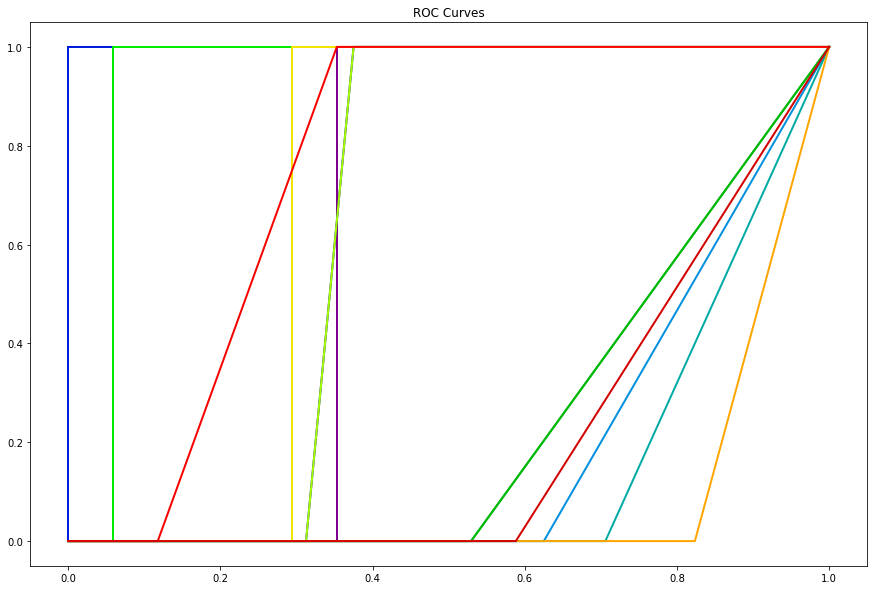

In [38]:
try:
    prob = Rn.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green>SVM model instantiaing, training and evaluating

In [39]:
svm = SVC(probability=True)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)

In [40]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       0.33      1.00      0.50         1
          83       0.00      0.00      0.00         1
          84       0.00      0.00      0.00         2
          85       1.00      1.00      1.00         1
          88       0.00      0.00      0.00         0
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00       

#### <font color = purple>Conclusion : SVM model has 56% score

### <font color = green>Cross Validation score to check if the model is overfitting

In [41]:
cv = cross_val_score(svm, x, y, cv = 3)
print('Cross Validation score of Knn model --->', cv.mean())

Cross Validation score of Knn model ---> 0.037037037037037035


#### <font color = purple> Conclusion : Knn model has 3% Cross Validation score

### <font color = green>ROC, AUC Curve

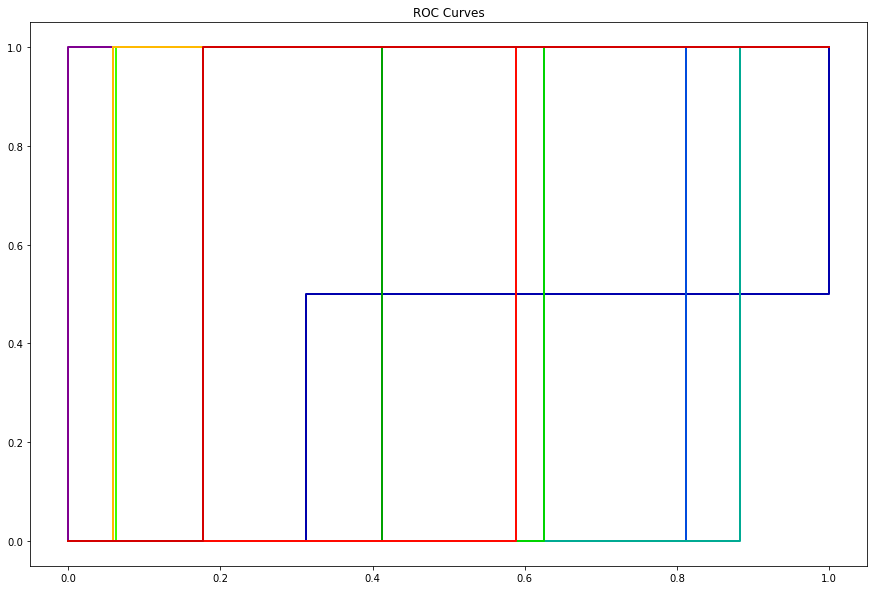

In [71]:
try: 
    prob = svm.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green>XGBoost model instantiaing, training and evaluating

In [43]:
xgb = xgb.XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [44]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          63       0.00      0.00      0.00         0
          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          76       0.00      0.00      0.00         2
          78       1.00      1.00      1.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       1.00      1.00      1.00         1
          83       0.33      1.00      0.50         1
          84       1.00      1.00      1.00         2
          85       1.00      1.00      1.00         1
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00         1

    accuracy                           0.83      

#### <font color = purple> Conclusion : XGB model has 83% score

### <font color = green>Cross Validation score to check if the model is overfitting

In [45]:
cv = cross_val_score(xgb, x, y, cv = 3)
print('Cross Validation score of XGB model --->', cv.mean())

Cross Validation score of XGB model ---> 0.0


#### <font color = purple>Conclusion : XGB model has 0% Cross Validation score

### <font color = green>ROC, AUC Curve

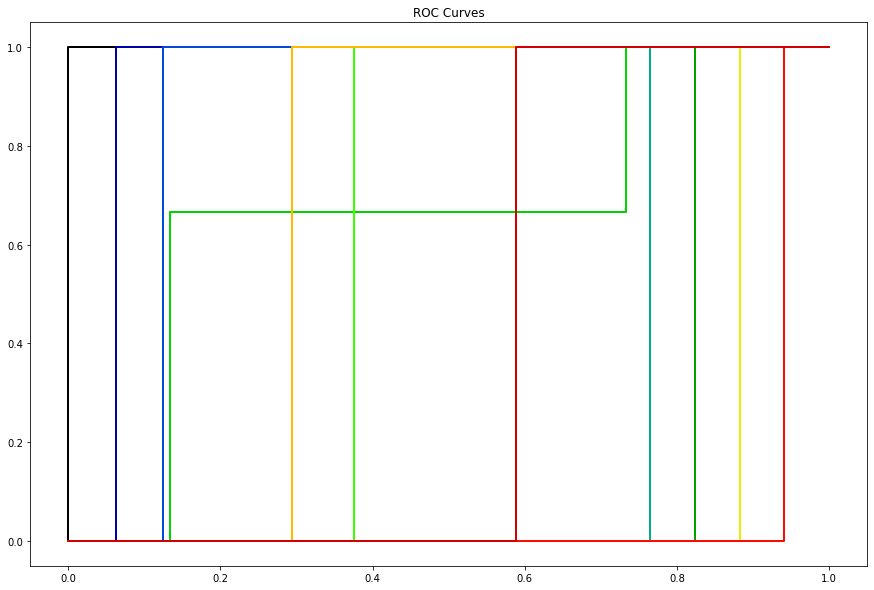

In [46]:
try: 
    prob = xgb.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green>Logistic Regression model instantiaing, training and evaluating


In [47]:
Lg = LogisticRegression()
Lg.fit(x_train, y_train)
y_pred = Lg.predict(x_test)

In [48]:
print('-----------------------------------------------------------\n')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------\n')

-----------------------------------------------------------


Classification Report:
              precision    recall  f1-score   support

          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       1.00      1.00      1.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       1.00      1.00      1.00         1
          83       0.00      0.00      0.00         1
          84       1.00      1.00      1.00         2
          85       1.00      1.00      1.00         1
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00         1

    accuracy                           0.78      

#### <font color = purple>Conclusion : Logistic Regression model has 78% score

### <font color = green> Cross Validation score to check if the model is overfitting

In [49]:
cv = cross_val_score(Lg, x, y, cv = 3)
print('Cross Validation score of Logistic Regression model --->', cv.mean())

Cross Validation score of Logistic Regression model ---> 0.0


#### <font color = purple>Conclusion : Logistic Regression model has 0% Cross Validation score

### <font color = green> ROC, AUC Curve

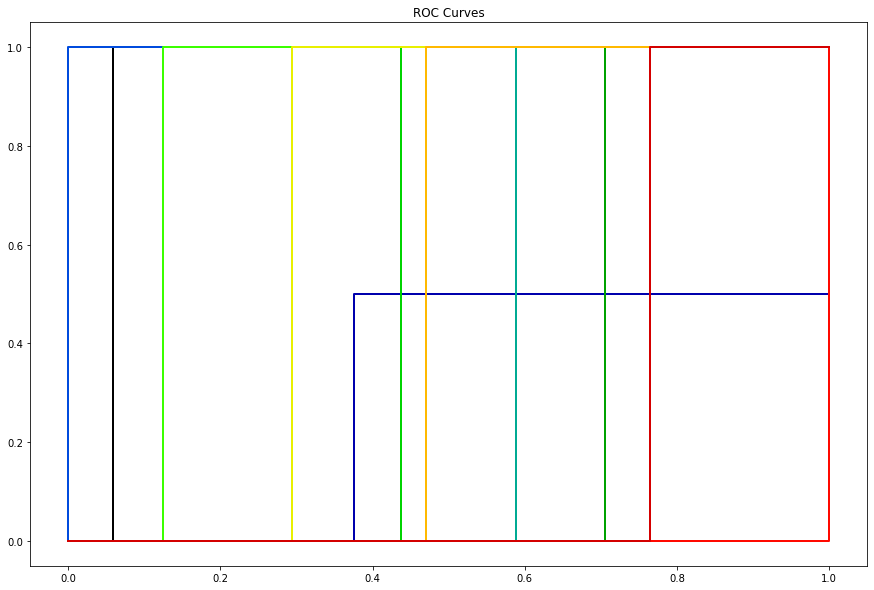

In [50]:
try: 
    prob = Lg.predict_proba(x_test) # calculating probability
    skplt.metrics.plot_roc(y_pred,prob, figsize = (15,10))
    plt.show()
except ValueError:
    pass

### <font color = green> Looking CV score we select KNN for Hyperparameter Tuning

In [62]:
grid_param = {'leaf_size' : [1,3,5], 'n_neighbors': [3], 
             'p':[1,2,3,4]}

In [63]:
grid_search = GridSearchCV(estimator = Knn, param_grid = grid_param, cv = 3 , n_jobs = -1)

In [64]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [1, 3, 5], 'n_neighbors': [3],
                         'p': [1, 2, 3, 4]})

In [65]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'leaf_size': 1, 'n_neighbors': 3, 'p': 2}


In [66]:
hkn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3, p = 2)
hkn.fit(x_train, y_train)
hkn.score(x_test, y_test)

0.3888888888888889

In [67]:
print('----------------------------------------------------------')
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits = 2))
print('------------------------------------------------------------')

----------------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

          67       1.00      1.00      1.00         1
          68       0.00      0.00      0.00         1
          71       1.00      1.00      1.00         2
          74       0.00      0.00      0.00         0
          76       0.00      0.00      0.00         2
          78       1.00      1.00      1.00         2
          79       1.00      1.00      1.00         1
          80       1.00      1.00      1.00         1
          81       1.00      1.00      1.00         1
          83       0.00      0.00      0.00         1
          84       1.00      1.00      1.00         2
          85       1.00      1.00      1.00         1
          92       1.00      1.00      1.00         1
          95       1.00      1.00      1.00         1
         100       1.00      1.00      1.00         1

    accuracy                           0.78        

#### <font color = purple>After Hyperparameter Tuning model accuracy score increase to 78% .

### <font color = green>Saving The Model

In [69]:
# saving the model to the Local file system
filename = 'Base ball project.pickle'
pickle.dump(hkn, open(filename, 'wb'))

## <font color = purple>Final Conclusion : Knn is our best model.